### Preprocessing

In [1]:
import numpy as np
import spacy 

def preprocessing(text_raw):
    
    nlp = spacy.load('es_core_news_sm')
    
    doc = nlp(text_raw)

    # Convertir a minúsculas, eliminar signos de puntuación y números
    
    preprocessed_tokens = []
    for token in doc:
        str(token).lower().strip()
        if token.is_alpha and not token.is_stop:
            preprocessed_tokens.append(str(token))
    
    # Unir las palabras preprocesadas en un solo texto
    preprocessed_text = ' '.join(preprocessed_tokens)
    
    return preprocessed_text

In [2]:
import docx

def read_docx(file_path):
    doc = docx.Document(file_path)
    content = []

    for paragraph in doc.paragraphs:
        content.append(paragraph.text)

    return '\n'.join(content)

In [3]:
import os

# Rutas a los archivos DOCX
ruta_base = 'Datos'
doc_files = [
    'doc01.docx', 'doc02.docx', 'doc03.docx', 'doc04.docx', 'doc05.docx',
    'doc06.docx', 'doc07.docx', 'doc08.docx', 'doc09.docx', 'doc10.docx',
    'doc11.docx', 'doc12.docx'
]

# Leer los documentos y almacenar en una lista
docs = []
for doc_file in doc_files:
    doc_path = os.path.join(ruta_base, doc_file)
    doc_content = read_docx(doc_path)
    docs.append(preprocessing(doc_content))

### Bag of words

In [4]:
pre_docs = []
for doc in docs:
    pre_docs.append(preprocessing(doc))
all_docs = ' '.join(pre_docs)
vocablos = set(all_docs.split())

In [5]:
def contar_palabras(cadenas, vocabulario):

    resultados = []

    for cadena in cadenas:
        palabras = cadena.split()
        conteo_palabras = [0] * len(vocabulario)

        for palabra in palabras:
            if palabra in vocabulario:
                indice = list(vocabulario).index(palabra)
                conteo_palabras[indice] += 1

        resultados.append(conteo_palabras)

    return resultados

In [6]:
word_vectors = contar_palabras(docs, vocablos)

Calcular la similitud del coseno entre todos los pares de documentos utilizando sus representaciones  vectoriales.

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

cos_similarity = cosine_similarity(word_vectors)

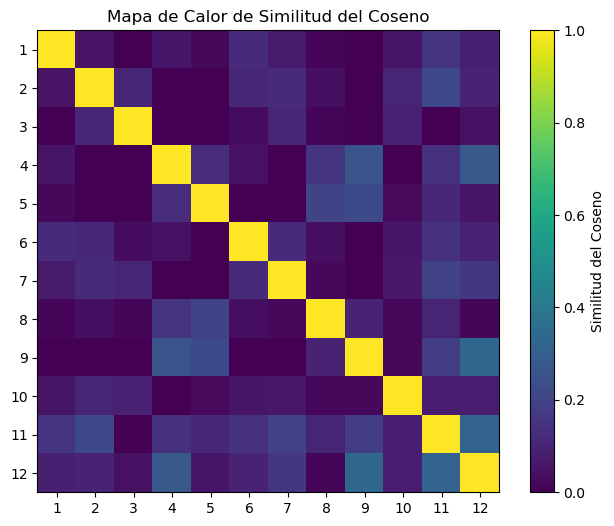

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(cos_similarity, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Similitud del Coseno')
plt.title('Mapa de Calor de Similitud del Coseno')
plt.xticks(range(len(word_vectors)), range(1, len(word_vectors) + 1))
plt.yticks(range(len(word_vectors)), range(1, len(word_vectors) + 1))
plt.show()